In [41]:
import sys
from pathlib import Path

# Set project root (we are inside Notebooks/)
PROJECT_ROOT = Path.cwd().parents[1]
sys.path.append(str(PROJECT_ROOT))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.model import build_policy_table
from src.metrics import add_cost_per_ton_metrics

OUTPUT_TABLES = PROJECT_ROOT / "outputs" / "tables"
OUTPUT_FIGS = PROJECT_ROOT / "outputs" / "figures"
OUTPUT_TABLES.mkdir(parents=True, exist_ok=True)
OUTPUT_FIGS.mkdir(parents=True, exist_ok=True)

np.random.seed(42)


In [42]:
policy_inputs = [
    {"Policy": "Baseline", "Y_TWh": 448, "C_g_per_kWh": 570, "Gov_Impact_$B": 0.000, "Firm_Impact_$B": 0.000},
    {"Policy": "Carbon Tax ($30/ton)", "Y_TWh": 403, "C_g_per_kWh": 513, "Gov_Impact_$B": 6.630, "Firm_Impact_$B": -7.660},
    {"Policy": "Clean Energy Subsidy", "Y_TWh": 480, "C_g_per_kWh": 412, "Gov_Impact_$B": -2.250, "Firm_Impact_$B": -2.830},
    {"Policy": "Dynamic Energy Pricing", "Y_TWh": 490, "C_g_per_kWh": 426, "Gov_Impact_$B": -0.070, "Firm_Impact_$B": -4.650},
    {"Policy": "Clean Energy Mandate (50%)", "Y_TWh": 480, "C_g_per_kWh": 500, "Gov_Impact_$B": -0.050, "Firm_Impact_$B": -2.240},
]

df = build_policy_table(policy_inputs)
df = add_cost_per_ton_metrics(df)

df.round(3)


,Policy,Y_TWh,C_g_per_kWh,Gov_Impact_$B,Firm_Impact_$B,Emissions_MMT,Abatement_MMT,Abatement_%,Gov_$per_ton,Firm_$per_ton,Total_Impact_$B,Total_$per_ton
0,Baseline,448,570,0.00,0.00,255.360,0.000,0.000,NaN,NaN,0.00,NaN
1,Carbon Tax ($30/ton),403,513,6.63,-7.66,206.739,48.621,19.040,136.361,-157.545,-1.03,-21.184
2,Clean Energy Subsidy,480,412,-2.25,-2.83,197.760,57.600,22.556,-39.063,-49.132,-5.08,-88.194
3,Dynamic Energy Pricing,490,426,-0.07,-4.65,208.740,46.620,18.257,-1.502,-99.743,-4.72,-101.244
4,Clean Energy Mandate (50%),480,500,-0.05,-2.24,240.000,15.360,6.015,-3.255,-145.833,-2.29,-149.089


In [43]:
portfolio = {
    "Policy": "Dynamic + Mandate (Portfolio)",
    "Y_TWh": 470,
    "C_g_per_kWh": 450,
    "Gov_Impact_$B": -0.100,
    "Firm_Impact_$B": -5.500
}

policy_inputs_portfolio = policy_inputs + [portfolio]

df_port = build_policy_table(policy_inputs_portfolio)
df_port = add_cost_per_ton_metrics(df_port)

df_port.round(3)


,Policy,Y_TWh,C_g_per_kWh,Gov_Impact_$B,Firm_Impact_$B,Emissions_MMT,Abatement_MMT,Abatement_%,Gov_$per_ton,Firm_$per_ton,Total_Impact_$B,Total_$per_ton
0,Baseline,448,570,0.00,0.00,255.360,0.000,0.000,NaN,NaN,0.00,NaN
1,Carbon Tax ($30/ton),403,513,6.63,-7.66,206.739,48.621,19.040,136.361,-157.545,-1.03,-21.184
2,Clean Energy Subsidy,480,412,-2.25,-2.83,197.760,57.600,22.556,-39.063,-49.132,-5.08,-88.194
3,Dynamic Energy Pricing,490,426,-0.07,-4.65,208.740,46.620,18.257,-1.502,-99.743,-4.72,-101.244
4,Clean Energy Mandate (50%),480,500,-0.05,-2.24,240.000,15.360,6.015,-3.255,-145.833,-2.29,-149.089
5,Dynamic + Mandate (Portfolio),470,450,-0.10,-5.50,211.500,43.860,17.176,-2.280,-125.399,-5.60,-127.679


In [44]:
cols = [
    "Policy",
    "Y_TWh",
    "C_g_per_kWh",
    "Emissions_MMT",
    "Abatement_MMT",
    "Abatement_%",
    "Gov_Impact_$B",
    "Firm_Impact_$B",
    "Total_Impact_$B",
    "Total_$per_ton"
]

df_port[cols].round(3)


,Policy,Y_TWh,C_g_per_kWh,Emissions_MMT,Abatement_MMT,Abatement_%,Gov_Impact_$B,Firm_Impact_$B,Total_Impact_$B,Total_$per_ton
0,Baseline,448,570,255.360,0.000,0.000,0.00,0.00,0.00,NaN
1,Carbon Tax ($30/ton),403,513,206.739,48.621,19.040,6.63,-7.66,-1.03,-21.184
2,Clean Energy Subsidy,480,412,197.760,57.600,22.556,-2.25,-2.83,-5.08,-88.194
3,Dynamic Energy Pricing,490,426,208.740,46.620,18.257,-0.07,-4.65,-4.72,-101.244
4,Clean Energy Mandate (50%),480,500,240.000,15.360,6.015,-0.05,-2.24,-2.29,-149.089
5,Dynamic + Mandate (Portfolio),470,450,211.500,43.860,17.176,-0.10,-5.50,-5.60,-127.679


In [45]:
rank_view = df_port[[
    "Policy",
    "Emissions_MMT",
    "Abatement_MMT",
    "Total_Impact_$B",
    "Total_$per_ton"
]].copy()

rank_view = rank_view[rank_view["Policy"] != "Baseline"].copy()
rank_view["Rank_Emissions (low=best)"] = rank_view["Emissions_MMT"].rank(method="min")
rank_view["Rank_$per_ton (low=best)"] = rank_view["Total_$per_ton"].rank(method="min")

rank_view = rank_view.sort_values(["Rank_Emissions (low=best)", "Rank_$per_ton (low=best)"])
rank_view.round(3)


,Policy,Emissions_MMT,Abatement_MMT,Total_Impact_$B,Total_$per_ton,Rank_Emissions (low=best),Rank_$per_ton (low=best)
2,Clean Energy Subsidy,197.760,57.600,-5.08,-88.194,1.0,4.0
1,Carbon Tax ($30/ton),206.739,48.621,-1.03,-21.184,2.0,5.0
3,Dynamic Energy Pricing,208.740,46.620,-4.72,-101.244,3.0,3.0
5,Dynamic + Mandate (Portfolio),211.500,43.860,-5.60,-127.679,4.0,2.0
4,Clean Energy Mandate (50%),240.000,15.360,-2.29,-149.089,5.0,1.0


In [46]:
label_map = {
    "Carbon Tax ($30/ton)": "Carbon Tax",
    "Clean Energy Subsidy": "Subsidy",
    "Dynamic Energy Pricing": "Dynamic Pricing",
    "Clean Energy Mandate (50%)": "Mandate (50%)",
    "Dynamic + Mandate (Portfolio)": "Dynamic+Mandate",
    "Baseline": "Baseline",
}

df_plot = df_port.copy()
df_plot["Label"] = df_plot["Policy"].map(label_map).fillna(df_plot["Policy"])


In [47]:
out_cols = [
    "Policy", "Label",
    "Y_TWh", "C_g_per_kWh",
    "Emissions_MMT", "Abatement_MMT", "Abatement_%",
    "Gov_Impact_$B", "Firm_Impact_$B", "Total_Impact_$B",
    "Total_$per_ton"
]

ranked_out = df_plot[out_cols].copy()
ranked_out = ranked_out.sort_values("Emissions_MMT")
ranked_out.round(3)


,Policy,Label,Y_TWh,C_g_per_kWh,Emissions_MMT,Abatement_MMT,Abatement_%,Gov_Impact_$B,Firm_Impact_$B,Total_Impact_$B,Total_$per_ton
2,Clean Energy Subsidy,Subsidy,480,412,197.760,57.600,22.556,-2.25,-2.83,-5.08,-88.194
1,Carbon Tax ($30/ton),Carbon Tax,403,513,206.739,48.621,19.040,6.63,-7.66,-1.03,-21.184
3,Dynamic Energy Pricing,Dynamic Pricing,490,426,208.740,46.620,18.257,-0.07,-4.65,-4.72,-101.244
5,Dynamic + Mandate (Portfolio),Dynamic+Mandate,470,450,211.500,43.860,17.176,-0.10,-5.50,-5.60,-127.679
4,Clean Energy Mandate (50%),Mandate (50%),480,500,240.000,15.360,6.015,-0.05,-2.24,-2.29,-149.089
0,Baseline,Baseline,448,570,255.360,0.000,0.000,0.00,0.00,0.00,NaN


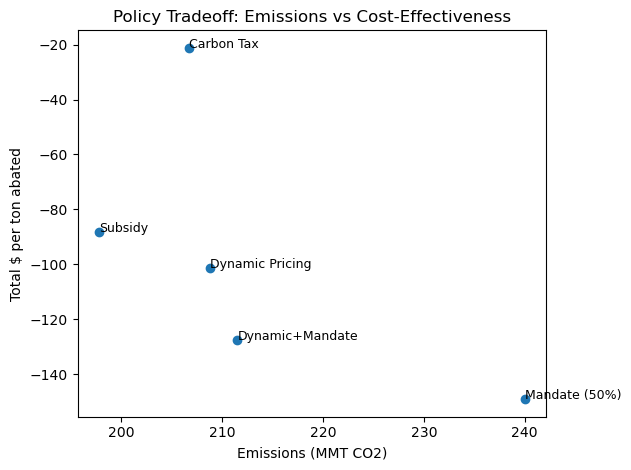

In [48]:
plot_df = df_plot[df_plot["Policy"] != "Baseline"].copy()
plot_df = plot_df.sort_values("Emissions_MMT")

plt.figure()
plt.scatter(plot_df["Emissions_MMT"], plot_df["Total_$per_ton"])

for _, r in plot_df.iterrows():
    plt.text(r["Emissions_MMT"], r["Total_$per_ton"], r["Label"], fontsize=9)

plt.xlabel("Emissions (MMT CO2)")
plt.ylabel("Total $ per ton abated")
plt.title("Policy Tradeoff: Emissions vs Cost-Effectiveness")
plt.tight_layout()
plt.show()


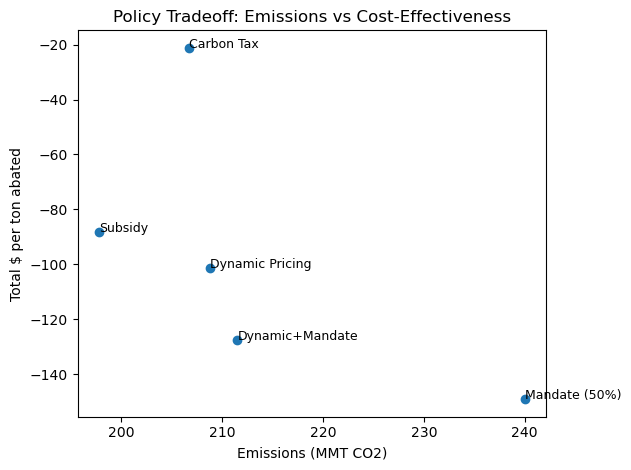

WindowsPath('c:/Users/Finn Case/OneDrive/Desktop/ai-datacenter-policy-model/outputs/figures/portfolio_tradeoff.png')

In [49]:
fig_path = OUTPUT_FIGS / "portfolio_tradeoff.png"
plt.figure()
plt.scatter(plot_df["Emissions_MMT"], plot_df["Total_$per_ton"])
for _, r in plot_df.iterrows():
    plt.text(r["Emissions_MMT"], r["Total_$per_ton"], r["Label"], fontsize=9)
plt.xlabel("Emissions (MMT CO2)")
plt.ylabel("Total $ per ton abated")
plt.title("Policy Tradeoff: Emissions vs Cost-Effectiveness")
plt.tight_layout()
plt.savefig(fig_path, dpi=200)
plt.show()
fig_path


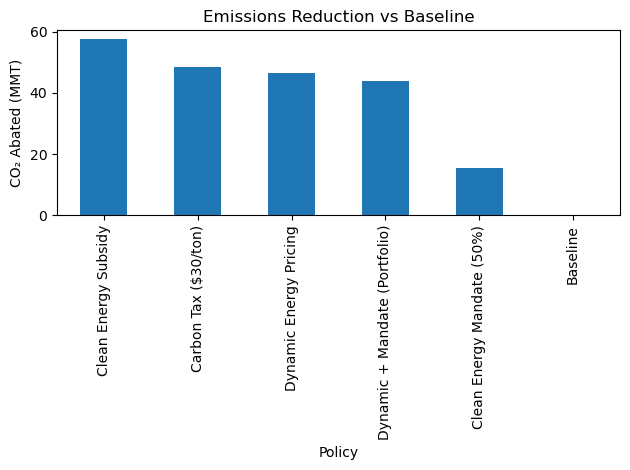

In [50]:
import matplotlib.pyplot as plt

# Select policies to compare
abatement = df_port.set_index("Policy")["Abatement_MMT"]

# Sort by most CO2 saved
abatement = abatement.sort_values(ascending=False)

plt.figure()
abatement.plot(kind="bar")

plt.ylabel("CO₂ Abated (MMT)")
plt.title("Emissions Reduction vs Baseline")
plt.tight_layout()
plt.show()


C:\Users\Finn Case\AppData\Local\Temp\ipykernel_27292\3138937119.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(plot_df["Policy"], rotation=45, ha="right")


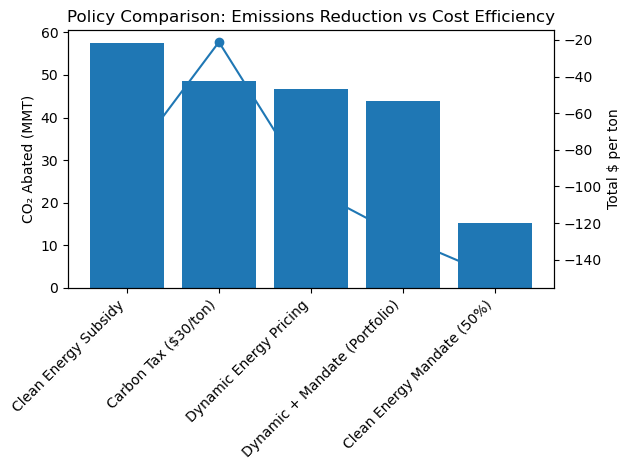

In [51]:
import matplotlib.pyplot as plt

# Drop baseline (no abatement, no cost per ton meaningfully defined)
plot_df = df_port[df_port["Policy"] != "Baseline"].copy()

# Sort by emissions (low emissions = better environmental outcome)
plot_df = plot_df.sort_values("Emissions_MMT")

fig, ax1 = plt.subplots()

# --- Emissions Reduction (bars) ---
ax1.bar(
    plot_df["Policy"],
    plot_df["Abatement_MMT"],
)
ax1.set_ylabel("CO₂ Abated (MMT)")
ax1.set_xticklabels(plot_df["Policy"], rotation=45, ha="right")

# --- Cost per ton (line on secondary axis) ---
ax2 = ax1.twinx()
ax2.plot(
    plot_df["Policy"],
    plot_df["Total_$per_ton"],
    marker="o"
)
ax2.set_ylabel("Total $ per ton")

plt.title("Policy Comparison: Emissions Reduction vs Cost Efficiency")
plt.tight_layout()
plt.show()


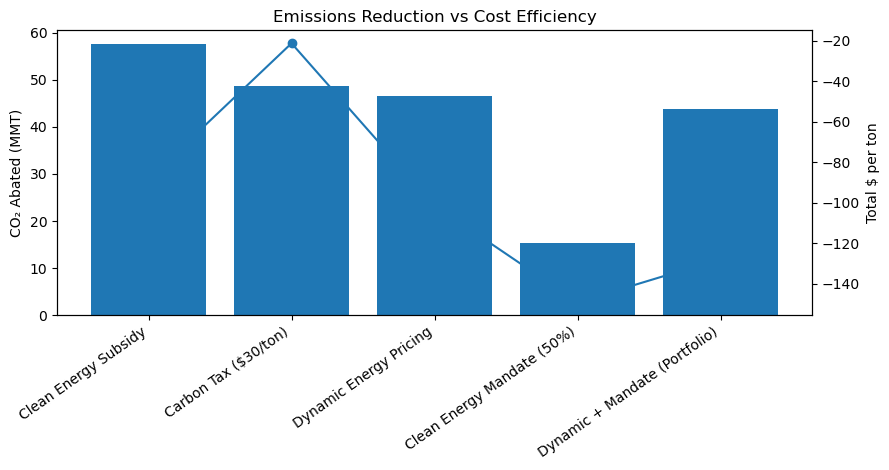

WindowsPath('c:/Users/Finn Case/OneDrive/Desktop/ai-datacenter-policy-model/outputs/figures/policy_tradeoff_abatement_vs_cost.png')

In [52]:
import matplotlib.pyplot as plt

plot_df = df_port.copy()
plot_df = plot_df[plot_df["Policy"] != "Baseline"].copy()

order = [
    "Clean Energy Subsidy",
    "Carbon Tax ($30/ton)",
    "Dynamic Energy Pricing",
    "Clean Energy Mandate (50%)",
    "Dynamic + Mandate (Portfolio)",
]
plot_df["Policy"] = pd.Categorical(plot_df["Policy"], categories=order, ordered=True)
plot_df = plot_df.sort_values("Policy")

x = range(len(plot_df))
abatement = plot_df["Abatement_MMT"].astype(float).values
cost_per_ton = plot_df["Total_$per_ton"].astype(float).values

fig, ax1 = plt.subplots(figsize=(9, 4.8))

ax1.bar(x, abatement)
ax1.set_ylabel("CO₂ Abated (MMT)")
ax1.set_xticks(list(x))
ax1.set_xticklabels(plot_df["Policy"].astype(str), rotation=35, ha="right")

ax2 = ax1.twinx()
ax2.plot(x, cost_per_ton, marker="o")
ax2.set_ylabel("Total $ per ton")

ax1.set_title("Emissions Reduction vs Cost Efficiency")

plt.tight_layout()

fig_path = OUTPUT_FIGS / "policy_tradeoff_abatement_vs_cost.png"
plt.savefig(fig_path, dpi=200)
plt.show()

fig_path


In [53]:
compare = df_port.set_index("Policy").loc[
    ["Clean Energy Mandate (50%)", "Dynamic + Mandate (Portfolio)"],
    ["Emissions_MMT", "Abatement_MMT", "Total_$per_ton"]
].round(3)

compare


,Emissions_MMT,Abatement_MMT,Total_$per_ton
Policy,,,
Clean Energy Mandate (50%),240.0,15.36,-149.089
Dynamic + Mandate (Portfolio),211.5,43.86,-127.679


In [54]:
import numpy as np

np.random.seed(42)

N = 10000
shock_Y = np.random.normal(1.0, 0.10, N)
shock_C = np.random.normal(1.0, 0.10, N)

policies = df_port["Policy"].unique()

emissions_mc = {}
cost_mc = {}

baseline_row = df_port[df_port["Policy"] == "Baseline"].iloc[0]
baseline_Y = baseline_row["Y_TWh"]
baseline_C = baseline_row["C_g_per_kWh"]

baseline_emissions = baseline_Y * baseline_C / 1000

for policy in policies:
    row = df_port[df_port["Policy"] == policy].iloc[0]
    
    Y_sim = row["Y_TWh"] * shock_Y
    C_sim = row["C_g_per_kWh"] * shock_C
    
    emissions = Y_sim * C_sim / 1000
    emissions_mc[policy] = emissions
    
    abatement = baseline_emissions - emissions
    
    total_cost = row["Gov_Impact_$B"] + row["Firm_Impact_$B"]
    cost_per_ton = total_cost / abatement
    
    cost_mc[policy] = cost_per_ton


In [55]:
risk_table = pd.DataFrame({
    "MC_Mean_Emissions": {p: emissions_mc[p].mean() for p in policies},
    "MC_P95_Emissions": {p: np.percentile(emissions_mc[p], 95) for p in policies},
    "MC_Emissions_90pct_Range": {
        p: np.percentile(emissions_mc[p], 95) - np.percentile(emissions_mc[p], 5)
        for p in policies
    },
    "MC_Mean_Cost_per_Ton": {p: cost_mc[p].mean() for p in policies},
    "MC_P95_Cost_per_Ton": {p: np.percentile(cost_mc[p], 95) for p in policies},
    "MC_Cost_90pct_Range": {
        p: np.percentile(cost_mc[p], 95) - np.percentile(cost_mc[p], 5)
        for p in policies
    }
}).round(3)

risk_table.sort_values("MC_Mean_Emissions")


,MC_Mean_Emissions,MC_P95_Emissions,MC_Emissions_90pct_Range,MC_Mean_Cost_per_Ton,MC_P95_Cost_per_Ton,MC_Cost_90pct_Range
Clean Energy Subsidy,197.968,245.956,91.860,-0.120,-0.046,0.279
Carbon Tax ($30/ton),206.957,257.123,96.031,-0.113,0.031,0.125
Dynamic Energy Pricing,208.960,259.612,96.960,-0.159,0.217,0.693
Dynamic + Mandate (Portfolio),211.723,263.044,98.242,-0.509,0.356,0.956
Clean Energy Mandate (50%),240.253,298.490,111.480,0.177,0.429,0.911
Baseline,255.629,317.594,118.615,0.000,0.000,0.000


Interpretation:

The Monte Carlo model results show that the policy with the lowest emissions would be the Clean Energy Subsidy, yet this requires large fiscal costs and long term continued government spending.
The proposed Clean Energy Mandate would have large emission reductions, but also has the most uncertainty indicating possible economic risk. This policy would also require reporting requirements.
The conclusive combination of using both Dynamic Energy Pricing and the Clean Energy Mandate does not lead to the lowest possible emissions, but does achieve a significant decrease at a lower cost per ton than many of the other policies. This option has large gains for a lower cost, keeping economic efficiency strong.
Under the uncertainty conditions, using extreme policies either have a large fiscal burden or economic volatility. The approach of using a mix of Dynamic Energy Pricing and a Clean Energy Mandate creates a more balanced outcome that reduces emissions while minimising the risk that comes with a single policy.
These results suggest that policy design should consider distributional risk and cost volatility rather than point estimates alone.
